## STOCHASTIC OSCILLATOR

### The Stochastic Oscillator is a momentum indicator comparing the closing price of a security to a range of prices over a certain period. 
### It is a popular technical indicator for generating overbought and oversold signals
### It looks at current price and compares to highest high and lowest low

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [30, 10]

In [2]:
cd ~

C:\Users\Michael


In [3]:
## Create reference to CSV file 
csv_path = Path('FinTech Bootcamp/New-Project-1/BTC Value.csv')

In [4]:
## Import CSV into pandas DataFrame
btc_df = pd.read_csv(csv_path, parse_dates=True,dayfirst=True,index_col=[0])
btc_df.head()

,Price (USD),open,high,low,Vol.,tradecount
Date,,,,,,
2017-08-17,4285.08,4469.93,4485.39,4200.74,2812379.11,NaN
2017-08-18,4108.37,4285.08,4371.52,3938.77,4994493.56,NaN
2017-08-19,4139.98,4108.37,4184.69,3850.00,1508239.39,NaN
2017-08-20,4086.29,4139.98,4211.08,4032.62,1915636.35,NaN
2017-08-21,4016.00,4086.29,4119.62,3911.79,2770592.06,NaN


In [5]:
## Rename Price (USD) column
btc_df = btc_df.rename(columns = {'Price (USD)':'close'})
btc_df.head()

,close,open,high,low,Vol.,tradecount
Date,,,,,,
2017-08-17,4285.08,4469.93,4485.39,4200.74,2812379.11,NaN
2017-08-18,4108.37,4285.08,4371.52,3938.77,4994493.56,NaN
2017-08-19,4139.98,4108.37,4184.69,3850.00,1508239.39,NaN
2017-08-20,4086.29,4139.98,4211.08,4032.62,1915636.35,NaN
2017-08-21,4016.00,4086.29,4119.62,3911.79,2770592.06,NaN


In [6]:
# Prepare DataFrame for Stochastic Oscillator
sto_df = btc_df.drop(columns=['Vol.', 'tradecount'])
sto_df

,close,open,high,low
Date,,,,
2017-08-17,4285.08,4469.93,4485.39,4200.74
2017-08-18,4108.37,4285.08,4371.52,3938.77
2017-08-19,4139.98,4108.37,4184.69,3850.00
2017-08-20,4086.29,4139.98,4211.08,4032.62
2017-08-21,4016.00,4086.29,4119.62,3911.79
...,...,...,...,...
2021-10-27,58413.44,60328.81,61496.00,58000.00
2021-10-28,60575.89,58413.44,62499.00,57820.00
2021-10-29,62253.71,60575.90,62980.00,60174.81


### What does the Stochastic Oscillator tell you?

#### The Stochastic Oscillator is range-bound between 0 and 100. Traditionally, readings over 80 are considered in the overbought range, and readings under 20 are considered undersold. 
#### Changes in the Stochastic Oscillator can also provide clues on future trend shifts. 

#### - %K or the "Fast Stochastic Oscillator" is the current value of the Stochastic Oscillator 
#### - %D or the "Slow Stochastic Oscillator" is the 3-period moving average of %K.

#### Signals are created when %K and %D intersect

In [7]:
#Calculate Stochastic Oscillator for entire data frame
sto_calc = sto_df['14-high'] = sto_df['high'].rolling(14).max()
sto_df['14-low'] = sto_df['low'].rolling(14).min()
sto_df['%K'] = (sto_df['close'] - sto_df['14-low'])*100/(sto_df['14-high'] - sto_df['14-low'])
sto_df['%D'] = sto_df['%K'].rolling(3).mean()
print(sto_df)

               close      open      high       low  14-high    14-low  \
Date                                                                    
2017-08-17   4285.08   4469.93   4485.39   4200.74      NaN       NaN   
2017-08-18   4108.37   4285.08   4371.52   3938.77      NaN       NaN   
2017-08-19   4139.98   4108.37   4184.69   3850.00      NaN       NaN   
2017-08-20   4086.29   4139.98   4211.08   4032.62      NaN       NaN   
2017-08-21   4016.00   4086.29   4119.62   3911.79      NaN       NaN   
...              ...       ...       ...       ...      ...       ...   
2021-10-27  58413.44  60328.81  61496.00  58000.00  67000.0  56818.05   
2021-10-28  60575.89  58413.44  62499.00  57820.00  67000.0  56850.00   
2021-10-29  62253.71  60575.90  62980.00  60174.81  67000.0  57820.00   
2021-10-30  61859.19  62253.70  62359.25  60673.00  67000.0  57820.00   
2021-10-31  61299.80  61859.19  62405.30  59945.36  67000.0  57820.00   

                   %K         %D  
Date           

### Plot for Period 1

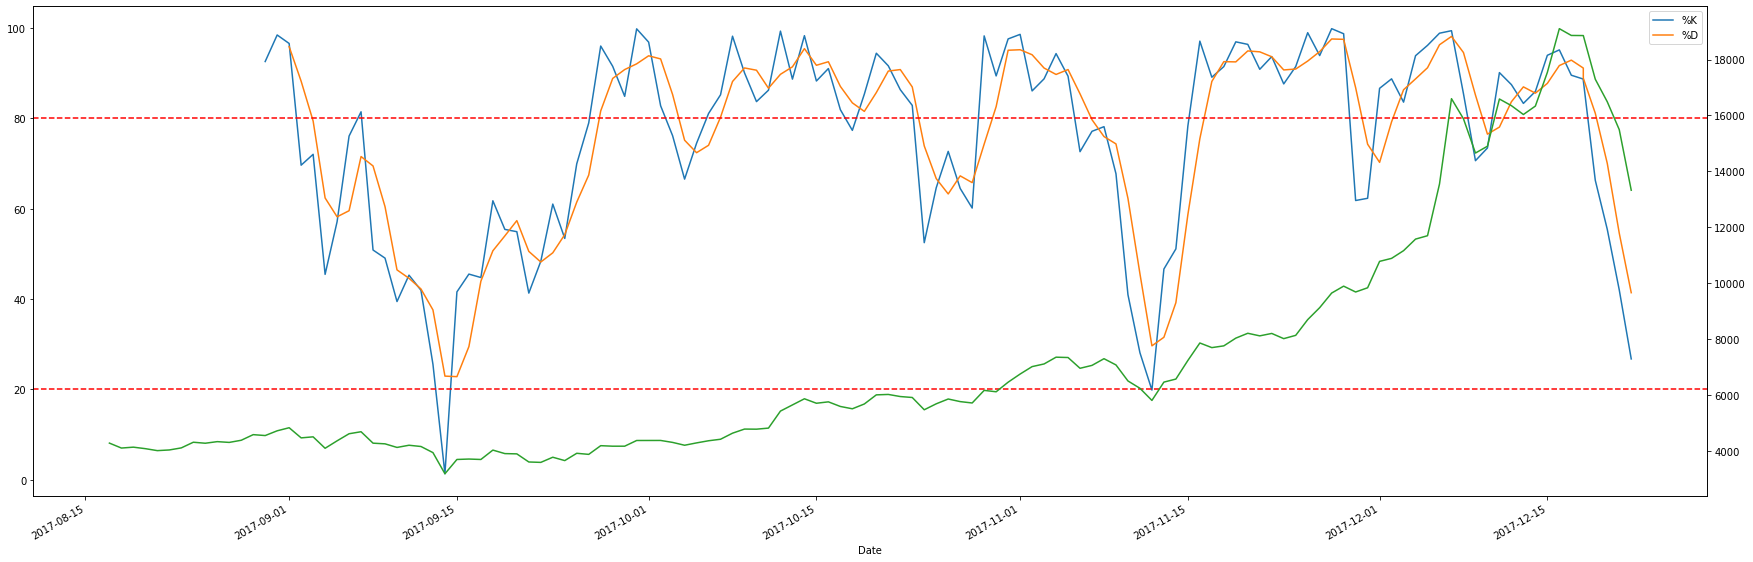

In [8]:
period_1 = sto_df.loc['2017-08-17':'2017-12-22']
ax = period_1[['%K', '%D']].plot()
period_1['close'].plot(ax=ax, secondary_y=True)
ax.axhline(20, linestyle='--', color="r")
ax.axhline(80, linestyle="--", color="r")
plt.show()

### Plot for Period 2

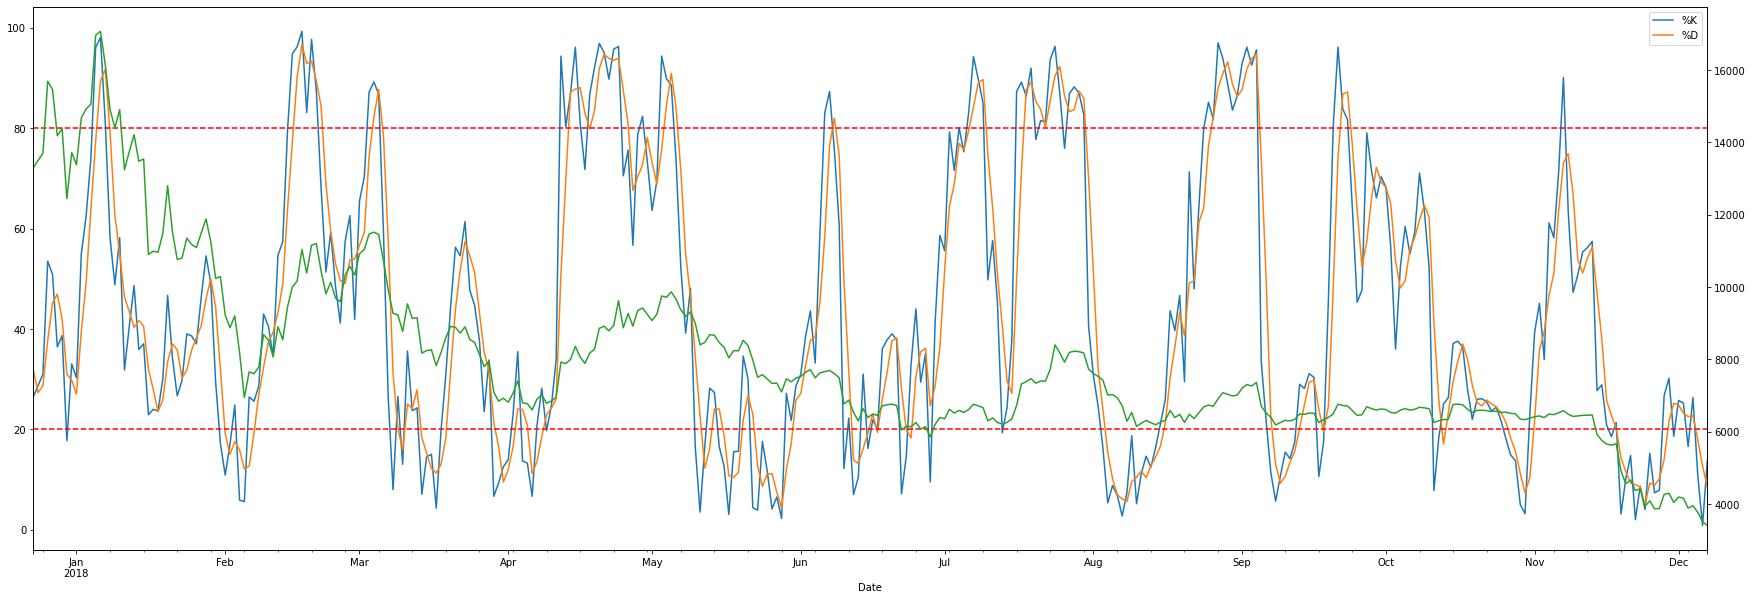

In [9]:
period_2 = sto_df.loc['2017-12-23':'2018-12-07']
ax = period_2[['%K', '%D']].plot()
period_2['close'].plot(ax=ax, secondary_y=True)
ax.axhline(20, linestyle='--', color="r")
ax.axhline(80, linestyle="--", color="r")
plt.show()

### Plot for Period 3

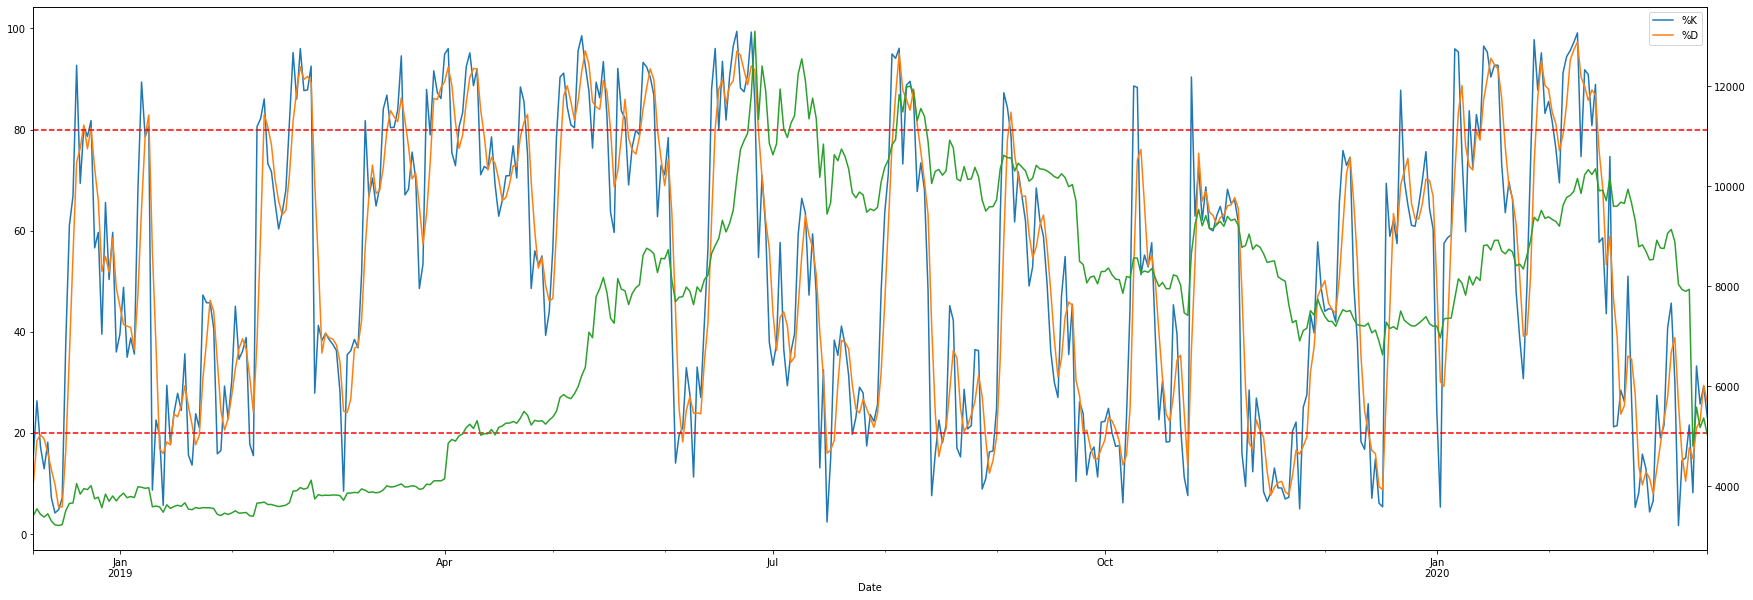

In [10]:
period_3 = sto_df.loc['2018-12-08':'2020-03-16']
ax = period_3[['%K', '%D']].plot()
period_3['close'].plot(ax=ax, secondary_y=True)
ax.axhline(20, linestyle='--', color="r")
ax.axhline(80, linestyle="--", color="r")
plt.show()

### Plot for Period 4

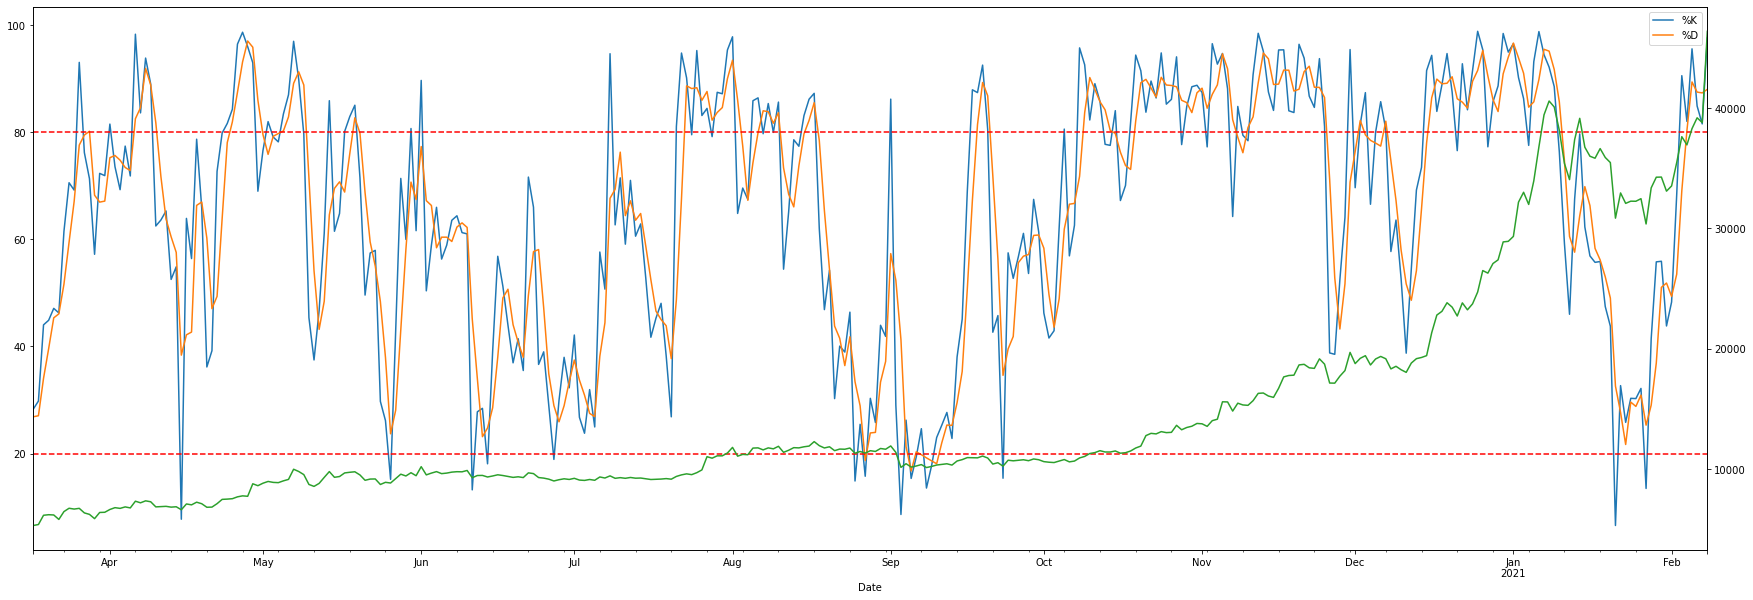

In [11]:
period_4 = sto_df.loc['2020-03-17':'2021-02-08']
ax = period_4[['%K', '%D']].plot()
period_4['close'].plot(ax=ax, secondary_y=True)
ax.axhline(20, linestyle='--', color="r")
ax.axhline(80, linestyle="--", color="r")
plt.show()

### Plot for Period 5

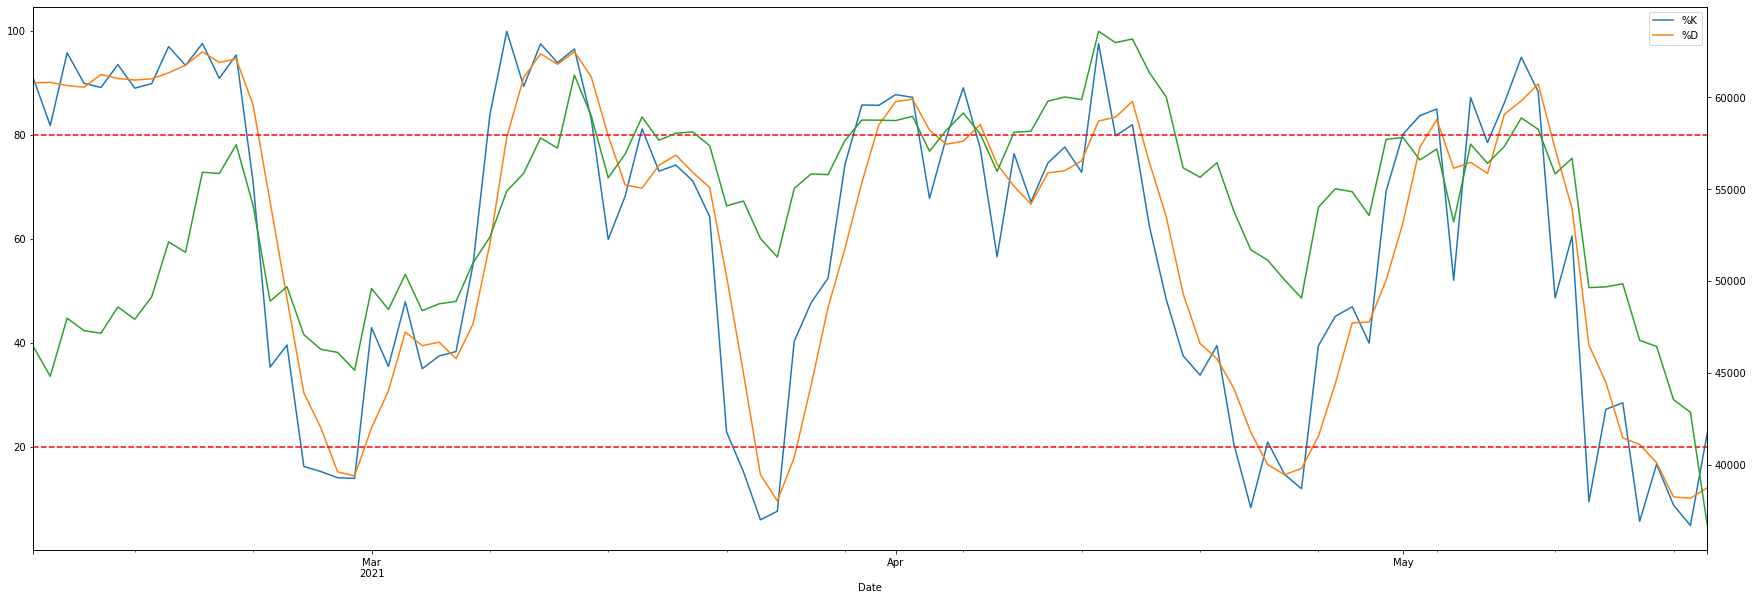

In [12]:
period_5 = sto_df.loc['2021-02-09':'2021-05-19']
ax = period_5[['%K', '%D']].plot()
period_5['close'].plot(ax=ax, secondary_y=True)
ax.axhline(20, linestyle='--', color="r")
ax.axhline(80, linestyle="--", color="r")
plt.show()

### Plot for Period 6

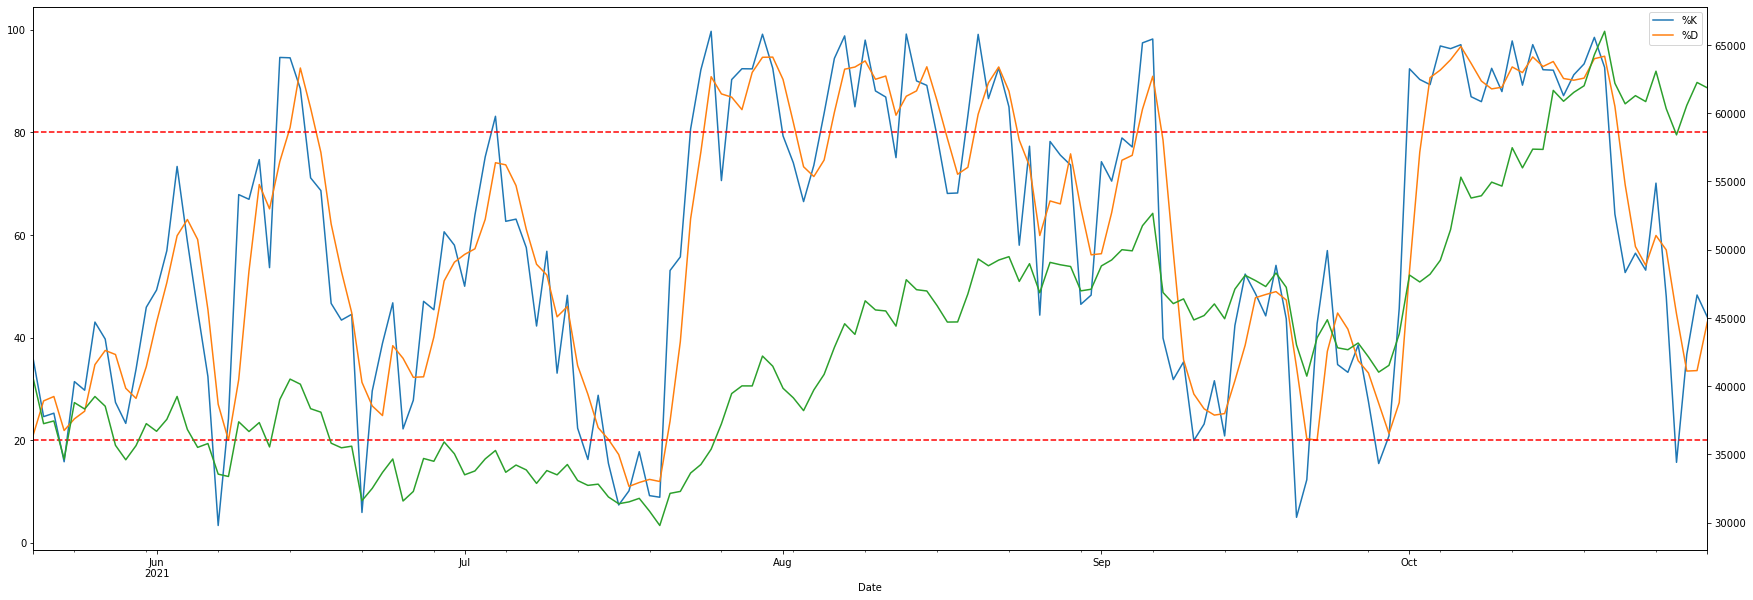

In [13]:
period_6 = sto_df.loc['2021-05-20':'2021-10-30']
ax = period_6[['%K', '%D']].plot()
period_6['close'].plot(ax=ax, secondary_y=True)
ax.axhline(20, linestyle='--', color="r")
ax.axhline(80, linestyle="--", color="r")
plt.show()

### Plot for entire time frame

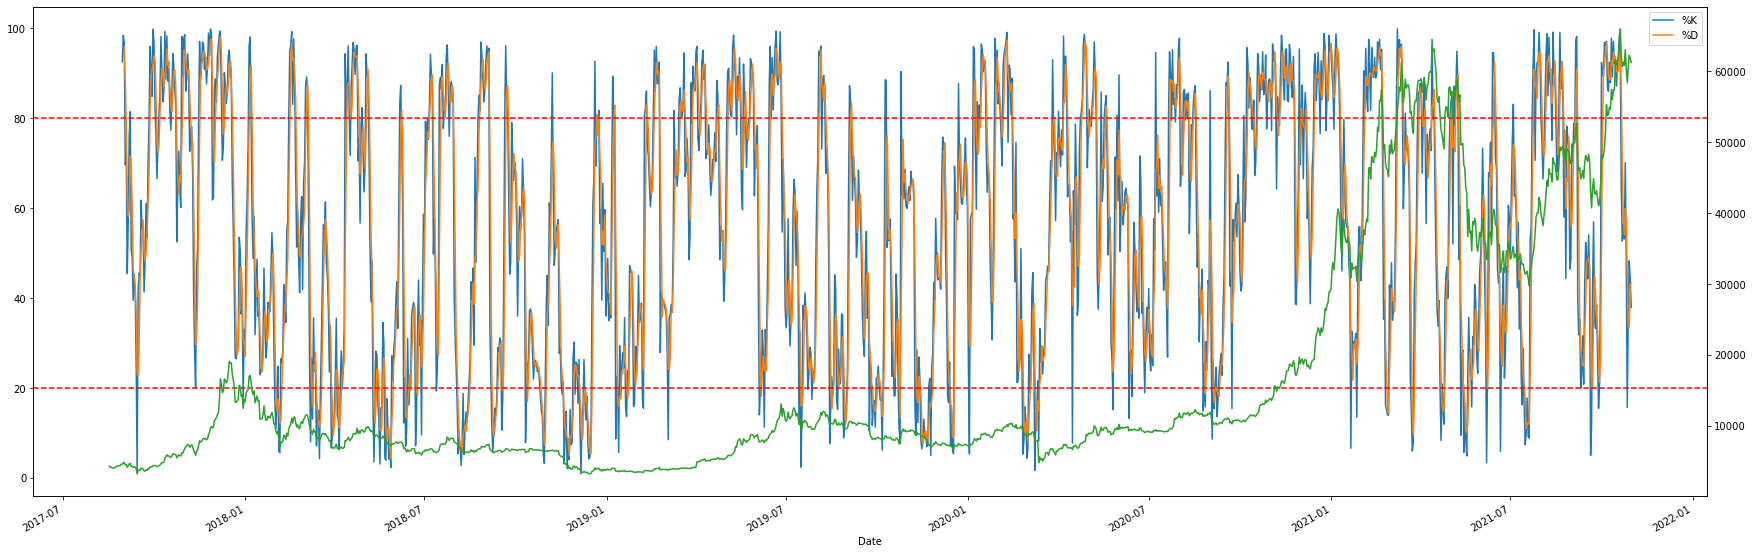

In [14]:
period_all = sto_df
ax = sto_df[['%K', '%D']].plot()
sto_df['close'].plot(ax=ax, secondary_y=True)
ax.axhline(20, linestyle='--', color="r")
ax.axhline(80, linestyle="--", color="r")
plt.show()

#### Uses
#### . Look for overbought/ oversold as indicators of reversals
#### . Trading Signals: When %K crosses below %D then sell, when %K crosses above %D then buy
#### . 